### Librairies et données

#### Import des librairies python utiles pour le TP.

La librairie lib_gs est destinée à être complétée au fur et à mesure du TP avec les nouvelles fonctions d'interpolation implémentées par vos soins.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import lib_gs as gs

#### Chargement des données

On force le format des données en colonne (dimension n,1)

In [4]:
data = np.loadtxt('points.dat')

In [5]:
x_obs = data[:,0:1]
y_obs = data[:,1:2]
z_obs = data[:,2:3]

### Visualisation des données en entrée

On visualise d'abord les sites de mesure

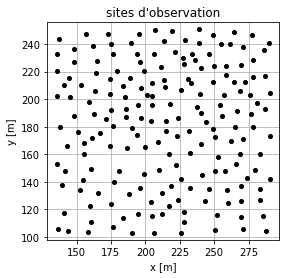

In [6]:
gs.plot_points(x_obs, y_obs, 
               xlabel = 'x [m]', ylabel = 'y [m]', title = "sites d'observation")

On visualise maintenant les sites de mesure coloré en fonction des valeurs prises par la variable régionalisée.

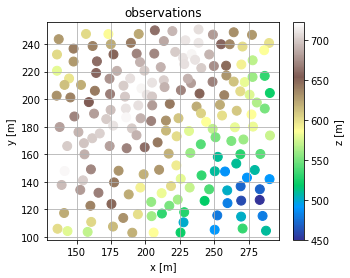

In [7]:
gs.plot_patch(x_obs, y_obs, z_obs, 
              xlabel = 'x [m]', ylabel = 'y [m]', zlabel = 'z [m]', title = "observations")

### Interpolation

Création d'une grille planimétrique pour l'interpolation. on utilise pour cela la fonction meshgrid qui à partir de deux vecteurs va fournir deux grilles régulières en x et y balleyant tout l'espace d'intérêt (description de la fonction meshgrid <a href="https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html">ici</a>) :

In [8]:
x_reg = np.linspace(np.floor(np.min(x_obs)), np.ceil(np.max(x_obs)), 100)
y_reg = np.linspace(np.floor(np.min(y_obs)), np.ceil(np.max(y_obs)), 100)
x_grd, y_grd = np.meshgrid( x_reg, y_reg )

Interpolation par plus proche voisin (PPV) ; cette fonction est la seule déjà implémentée

In [9]:
z_grd_int = gs.interp_ppv(x_obs, y_obs, z_obs, x_grd, y_grd)

#### Visualiation de l'interpolation PPV sous forme de lignes de niveau

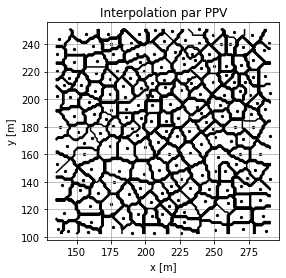

In [10]:
gs.plot_contour_2d(x_grd, y_grd, z_grd_int, 
                   x_obs, y_obs, xlabel = 'x [m]', ylabel = 'y [m]', title = 'Interpolation par PPV')

#### Visualiation de l'interpolation PPV sous forme d'une surface colorée

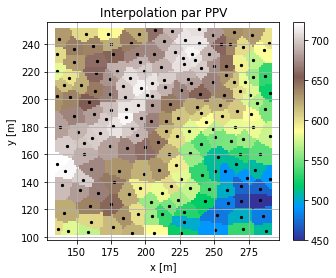

In [11]:
gs.plot_surface_2d(x_grd, y_grd, z_grd_int, 
                   x_obs, y_obs, xlabel = 'x [m]', ylabel = 'y [m]', title = 'Interpolation par PPV')

#### Interpolation en un point de l'espace

In [12]:
zi = gs.interp_ppv(x_obs, y_obs, z_obs, np.array([[225]]),  np.array([[180]]))

In [13]:
print("La valeur interpolée en (225,180) est "+str(zi))

La valeur interpolée en (225,180) est [[610.]]
